# ENPH 213 - Week 8 Lab

In this lab, we will be working on Inverse Discrete Fourier Transforms, Fourier Analysis, and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab8, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10) and Part 4 will be marked out of 5.

In [1]:
import numpy as np
import cmath as cm
import math as m
from matplotlib import pyplot as plt
%matplotlib inline
import random

# Part 1

Create a function $cDFT(y)$ that calculates the $y_k$ coefficients using the complex form for discrete Fourier transforms $e^{-jk 2\pi i / N}$.  

When generating the data set, first create your x-points in the range from 0 to 6, and use at least 10,000 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2}$

to evaluate on that range of x-values.  Use this function in your new $cDFT(y)$ to compute the $y_k$ values.  Plot the $|y_k|$ values and print the first 10 values of the $y_k$ array.


first 10 yk values:
 [ 0.05893409+0.j         -0.05829273-0.00045784j  0.05641023+0.00088616j
 -0.05340684-0.0012586j   0.04946883+0.00155462j -0.0448293 -0.00176135j
  0.03974548+0.00187435j -0.0344754 -0.0018973j   0.02925676+0.00184068j
 -0.02429063-0.00171987j]


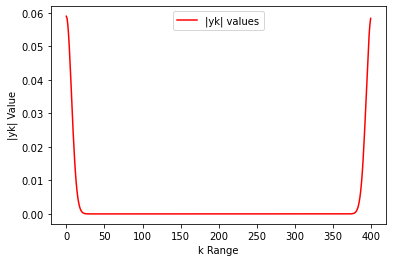

In [15]:
# function for complex coeff
def 𝑐𝐷𝐹𝑇(𝑦):
    N = len(y) # length of y
    yk = np.zeros(N, dtype = 'cdouble') # initalizing an array of zeros for size y
    
    for k in range(N):        # compute yk
        for j in range(N):
            yk[k] += y[j]*np.exp(-1j*k*2*np.pi*j/N)
            
    yk = yk/N
    return yk

# Please Read ******** My computer cannot run 10,000 points I used 1000
t = np.linspace(0,6,400) 
kVal = np.arange(len(t))

def y(t):
    return np.exp(-25*(t-3)**2) # calulate y using t

y = y(t)

yk = cDFT(y) # call the function with y
print("first 10 yk values:\n",yk[0:10]) # print the first 10 values of yk

absYk = abs(yk) #compute the absolute of yk

#plot the |yk| vs t
plt.plot(kVal, absYk, 'r', label = '|yk| values')

plt.xlabel("k Range")
plt.ylabel("|yk| Value")
plt.legend(loc='upper center')
plt.show()


# Part 2

Create a function $iDFT(yk)$ that calculates the $\tilde y_i$ coefficients using the complex form for inverse discrete Fourier transforms.  

As in Part 1, when generating the data set, first create your x-points in the range from 0 to 6, and use at least 200 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2} + 0.03 \cos(46 \pi t)$

to evaluate on that range of x-values.  Use this function in your $cDFT(y)$ from Part 1 to compute the $y_k$ values.  Plot the $|y_k|$ values to understand the contriubtion of the cosine noise term.  

Create a small bit of code to remove the noise from your $y_k$ values that is general enought that if the frequency of the cosine noise is changed slightly, it would still remove the noise.  

Then, apply your new $iDFT(yk)$ Inverse Transform to the filtered data.  Then, plot the real part of the data.

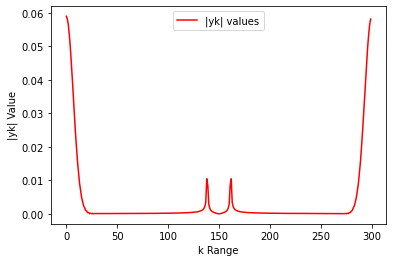

In [3]:
t = np.linspace(0, 6, 300)
kVal = np.arange(len(t))

def 𝑖𝐷𝐹𝑇(𝑦𝑘):
    N = len(yk) # length of y
    yi = np.zeros(N, dtype = 'cdouble') # initalizing an array of zeros for size yk
    
    for k in range(N):        # compute yi
        for j in range(N):
            yi[k] += yk[j]*np.exp(1j*k*2*np.pi*j/N)
            
    return yi


def y(t):
    return np.exp(-25*(t-3)**2) + 0.03*np.cos(46*np.pi*t)

y = y(t)

yk = cDFT(y)
absYk = abs(yk) #compute the absolute of yk

#plot the |yk| vs t, now with the cosine noise term
plt.plot(kVal, absYk, 'r', label = '|yk| values')

plt.xlabel("k Range")
plt.ylabel("|yk| Value")
plt.legend(loc='upper center')
plt.show()

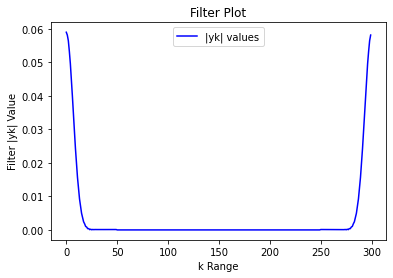

In [4]:
## filter the data
def filter(absYk):
    N = len(absYk)
    absYk[N//6:-N//6] = 0 # filter the middle data to zero
    
    return absYk

filter_absYk =  filter(absYk) # call the filter func

#plot the filtered |yk| vs t, now with the cosine noise term
plt.plot(kVal, filter_absYk, 'b', label = '|yk| values')

plt.title("Filter Plot")
plt.xlabel("k Range")
plt.ylabel("Filter |yk| Value")
plt.legend(loc='upper center')
plt.show()

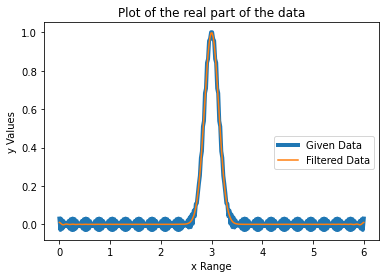

In [5]:
# now need to plot the real data
yk_filter = filter(yk) # get the filtered yk data
y_inverse = iDFT(yk_filter)    # apply the inverse transform to the filtered data

plt.plot(t, np.real(y), label = 'Given Data', lw =4)      
plt.plot(t, np.real(y_inverse), label = 'Filtered Data')  
plt.xlabel('x Range')
plt.ylabel('y Values')
plt.title('Plot of the real part of the data')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

# Part 3

Download the Lab8-PeriodicData.txt file and load it into the notebook. Apply a windowing function and plot the function with the x-axis as the index points.  Use the built-in Numpy FFT function to transform the dataset.  Then, in the change 3 points in the $y_k$ data to create noticeable noise in the signal (plotting the $y_k$ values should help).  Finally, apply the Numpy iFFT function to recover the altered dataset.  Plot the real and imaginary parts of the altered data.

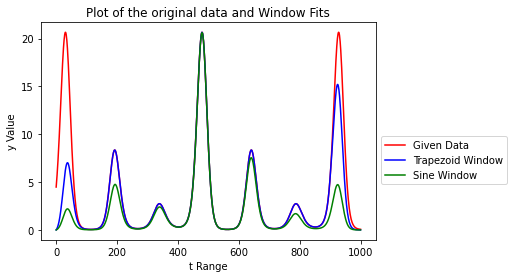

In [6]:
y = np.loadtxt("Lab8-PeriodicData.txt",delimiter = '\t')
t = np.arange(0,len(y),1)


#Code from Lab 7 - to apply the window functions
maxY = 1 # creating an arbitray max y-value of 1

def t𝑟𝑎𝑝𝑊𝑖𝑛𝑑𝑜𝑤(𝑥):
    size = len(x)                      #  setting the length to the size of the x array
    tenth = m.floor(size*0.1)          # creating a value for 1/10 the size. Needs to be an int value so using the floor function
    trapArray = np.ones(size)*maxY     # creating an array of Max Y values for the size of x
    
    for i in range(tenth):             # iterating through the array and making the first and last tenth linear plots slope of index/tenth
        trapArray[i] = i/tenth
        trapArray[-i-1]= i/tenth
        
    return trapArray


def sineWindow(x):
    size = len(x)                     #  setting the length to the size of the x array
    sineArray = np.ones(size)*maxY    #  initalizing the sine array
    
    for i in range (size):
        sineArray[i] = np.sin(i * np.pi/(size-1))     # calculating the sin window
        
    return sineArray

trapW = y*trapWindow(t) #taking the trapeziod window of the y data
sinW = y*sineWindow(t) #taking the sin window of the y data

#plot the filtered |yk| vs t, now with the cosine noise term
plt.plot(t, y, 'r', label = 'Given Data')
plt.plot(t, trapW, 'b', label = 'Trapezoid Window')
plt.plot(t, sinW, 'g', label = 'Sine Window')


plt.title("Plot of the original data and Window Fits")
plt.xlabel("t Range")
plt.ylabel("y Value")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


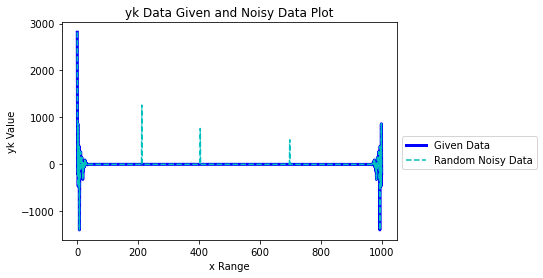

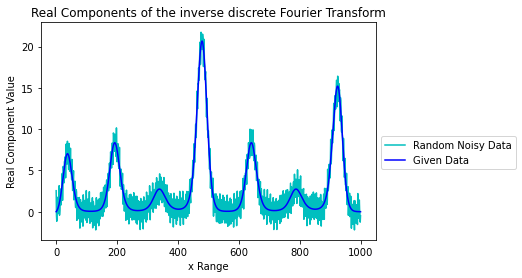

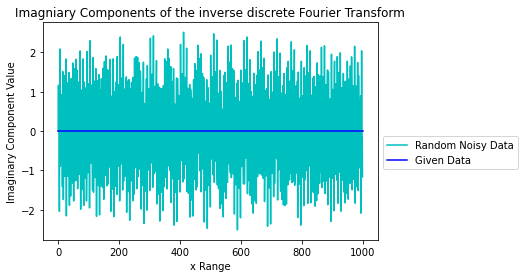

In [7]:
# Now can define a noise function to change 3 points
def Noise(yk, num):
    Noise = np.copy(yk) # initialize the Noise array using a copy of yk
    maxYk = max(yk) # find the max of the data
    #seed(1)
    
    for i in range(num): # iterate and change the number of poits given
        point = random.randint(0,len(yk)) # randomly choose a point in the array to change
        Noise[point] = random.random()*maxYk # randomly set the value of the point to a positive number less than the max
        
    #print(len(Noise)) #testing for size errors
        
    return Noise


#print(len(yk)) #testing for size errors
#print(len(t)) #testing for size errors
yk = np.fft.fft(trapW) # discrete Fourier Transform
yk_Noise = Noise(yk, 3) # generating a noisy data with 3 points changed

y_Noise = np.fft.ifft(yk_Noise) # inverse discrete Fourier Transform

# Ploting the functions including the yk values, real components and imaginary components 
plt.plot(t, yk, 'b',label = 'Given Data', lw = 3)
plt.plot(t, yk_Noise,'c--', label = 'Random Noisy Data')
plt.title('yk Data Given and Noisy Data Plot')
plt.ylabel('yk Value')
plt.xlabel("x Range")
plt.legend(bbox_to_anchor=(1.0, 0.5))

plt.show()


plt.plot(t, np.real(y_Noise),'c', label = 'Random Noisy Data')
plt.plot(t, np.real(trapW), 'b',label = 'Given Data')
plt.title('Real Components of the inverse discrete Fourier Transform')
plt.ylabel('Real Component Value')
plt.xlabel("x Range")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


plt.plot(t, np.imag(y_Noise),"c", label = 'Random Noisy Data')
plt.plot(t, np.imag(trapW), 'b',label = 'Given Data')
plt.title('Imagniary Components of the inverse discrete Fourier Transform')
plt.ylabel('Imaginary Component Value')
plt.xlabel("x Range")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

# Part 4

Download the Lab8-PeriodicData2.txt file fro onQ and load them into Jupyter.  This dataset is comprise of different regions and different frequencies.  For this part, you will create a moving window to analyse the frequencies in that window.  Consider the x-axis (first column) to be time in seconds.

Choose a windowing function (not the rectangular window) that is 101 points across and will be defined by its centre point.  From the windowed region, apply the Numpy FFT to determine the frequency and magnitude of the oscillatory componenets within the region (ie. position and hieght of the maxima in the FFT).  Note: you will have to determine the actual frequency from the period of the window and the k-value in the transformed data.

Scan the window across all possible times so that you can identify the strength and frequency of each component as a function of time.  Then, make a plot for each frequency that indicates its strength (in your window) as a function of time.

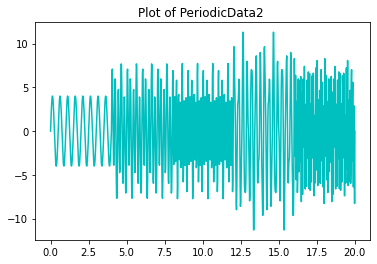

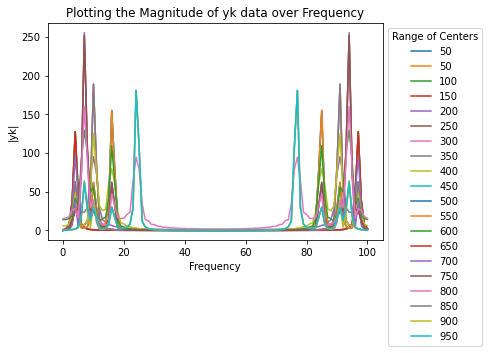

Repeating Frequencies: [12.566370614359172, 31.41592653589793, 50.26548245743669, 21.991148575128552, 75.39822368615503] 

 Index of Repeating Freq: [4, 10, 16, 7, 24] 
 Size of the index:  5


In [8]:

Periodic_Data = np.loadtxt("Lab8-PeriodicData2.txt", delimiter = ' ')  # load the text file into the notebook
x = Periodic_Data[:, 0] # set the first column to an x array
y = Periodic_Data[:, 1] # set the 2nd column to an y array
plt.plot(x, y, 'c-')

# plot the data to check that the text file loaded correctly
# this will also help visualize
plt.title('Plot of PeriodicData2 ')
plt.show()

#  windowing function (updated Sine Window Function)
def sineWindow (x, center):        
    W = np.zeros(101) # initalize a window array
    data = x[:,1] # set the data to the first row of given values
    
    # calculate the window array
    # by multiplying the index of each point by sine from 0 -> pi
    for i in range (len(W)): 
        W[i] = data[(i+center-50)]*np.sin(np.pi/(100)*i)
        
    return W


# Function that finds the highest freq and its' index from the given data
def findFreq (x, center):    
    yK = np.fft.fft(sineWindow(x, center)) # subset of the given data (yk)
    mag_yK = abs(yK)  # absolute value of subset
    
    max_indexs = np.argmax(mag_yK[0 : 51]) #index of max yk values 
    
    data = x[100, 0] 
    
    Maxfreq = 2*np.pi*max_indexs/data   # calculate the freq at the max indexs
    xval = np.arange(len(mag_yK)) # x range to plot the tranformed data
    
    plt.plot(xval, mag_yK, label = "%d"% center)    # plot the windowed yk data
    plt.title('Plotting the Magnitude of yk data over Frequency')
    plt.xlabel("Frequency")
    plt.ylabel("|yk|")
    plt.legend(title = "Range of Centers", bbox_to_anchor=(1.0, 1.0))

    return [max_indexs], [Maxfreq]

# call the findFreq function and return the first maxima values
index, frequency = findFreq(Periodic_Data, 50)    

# loop through the the centers and test maxima values
for i in range(50, 951, 50):          # iterate through the centers
    indexTest, frequencyTest = findFreq(Periodic_Data, i)     # initalize the findFreq and loop through all the maximums a diff centers
    
    if (frequency[-1] != frequencyTest):   # conditional test, if the last element of freq is different than new val
        frequency.extend(frequencyTest)   # store vals in original array
        index.extend(indexTest)
        
plt.show() # show the plots generated from the loop

# print the repeating freq
print("Repeating Frequencies:", frequency, '\n\n Index of Repeating Freq:', index, "\n Size of the index: ", len(index)) 



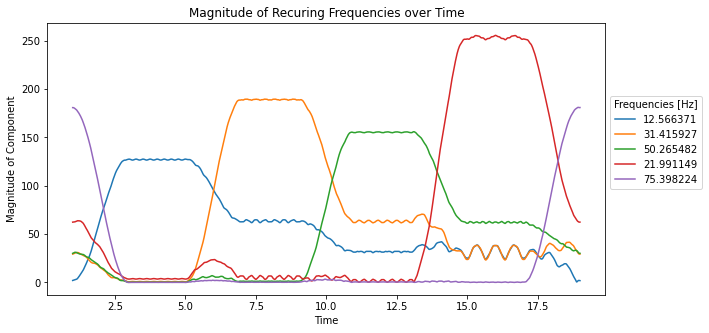

In [9]:
# Function to find the magnitude of a frequecny 
def FindMag (i,data, center):
    yk = np.fft.fft(sineWindow(data, center)) # call the sineWindow and plot the Fourier transform
    mag_yK = abs(yk[i]) # take the mag
    
    return  mag_yK

# declare the arrays to store the difference freq
freqMag, freqMag1, freqMag2, freqMag3, freqMag4 = np.zeros(901), np.zeros(901), np.zeros(901), np.zeros(901), np.zeros(901)

for i in range(901): # iterate through the mag arrays and store the data
    freqMag[i] = FindMag(index[0],Periodic_Data, i-50) 
    freqMag1[i] = FindMag(index[1], Periodic_Data, i-50)
    freqMag2[i] = FindMag(index[2],Periodic_Data, i-50)
    freqMag3[i] = FindMag(index[3],Periodic_Data, i-50)
    freqMag4[i] = FindMag(index[4],Periodic_Data, i-50)

# array of spliced data given for the center points of the window
timeRange = Periodic_Data[50:951, 0]

# finally plot the freq over the time range
plt.figure(figsize = (10,5))  
plt.title('Magnitude of Recuring Frequencies over Time')
plt.plot(timeRange, freqMag, label = '%f' %frequency[0])
plt.plot(timeRange, freqMag1, label = '%f' %frequency[1])
plt.plot(timeRange, freqMag2, label = '%f' %frequency[2])
plt.plot(timeRange, freqMag3, label = '%f' %frequency[3])
plt.plot(timeRange, freqMag4, label = '%f' %frequency[4])
plt.legend(title = 'Frequencies [Hz]',bbox_to_anchor=(1.0, 0.75))
plt.xlabel('Time')
plt.ylabel('Magnitude of Component')

plt.show()

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

In [10]:
# All Code was written by Nathan Pacey. Topics were discussed with Ekin Yelken and Leanne Davis.